In [1]:
from getdist import plots
import getdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tests de base

In [2]:
path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/"
run = getdist.loadMCSamples(path+'planckCL_PP_vJul2024_single_pipV',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)

C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data\planckCL_PP_vJul2024_single_pipV.1.txt
Removed 0.3 as burn in


<Figure size 900x675 with 0 Axes>

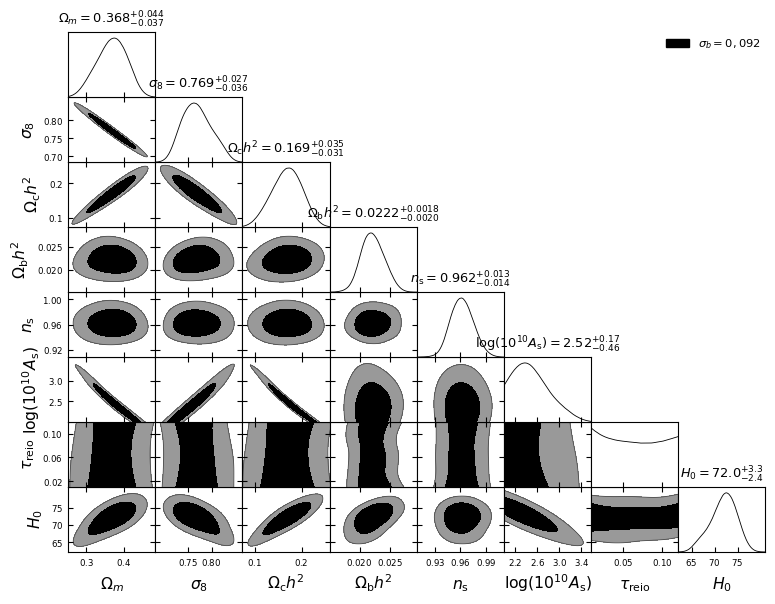

In [7]:
samples = [run]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["omegam", "sigma8", "omch2","ombh2","ns","logA","tau","H0"],   # Paramètres à afficher
    filled=[True],
    legend_labels=[r"$\sigma_b = 0,092$", r"$\sigma_b = 0.046$", r"$\sigma_b = 0.023$"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "red"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('Cosmo_tSZ.pdf')

<Figure size 900x675 with 0 Axes>

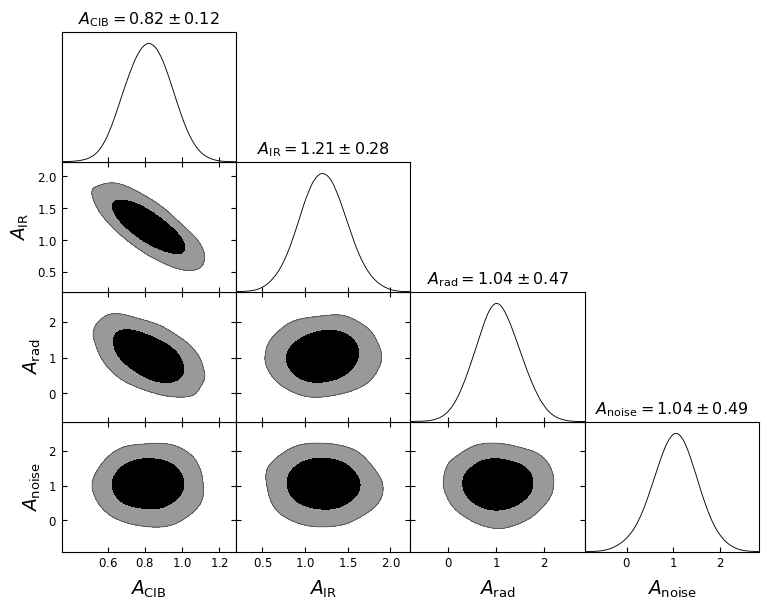

In [6]:
samples = [run]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["Arescib", "Aresir", "Aresrad", "Anoise"],   # Paramètres à afficher
    filled=[True],
    legend_labels=[],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('As_tSZ.pdf')

# Mock datas

## Comparaison des données

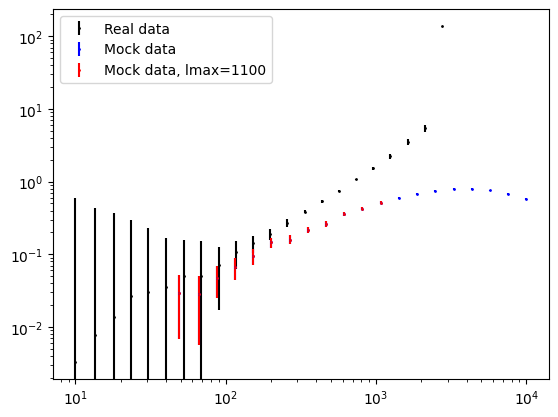

In [10]:
# Read the file ToMarian2.dat
real_data = pd.read_csv('ToMarian2.dat', delim_whitespace=True)
mock_data_lmax = pd.read_csv('Mock_A10_lmax1100.txt', delim_whitespace=True)
mock_data = pd.read_csv('Mock_A10.txt', delim_whitespace=True)

# Display the first few rows of the dataframe
real_l = real_data['ell']
real_Cl = real_data['clyy']
real_err = real_data['err']

mock_l = mock_data['ell']
mock_Cl = mock_data['clyy']
mock_err = mock_data['err_stat']

mock_lmax_l = mock_data_lmax['ell']
mock_lmax_Cl = mock_data_lmax['clyy']
mock_lmax_err = mock_data_lmax['err_stat']

plt.errorbar(real_l, real_Cl, yerr=real_err, fmt='o', color='black', label='Real data', markersize = 1)
plt.errorbar(mock_l, mock_Cl, yerr=mock_err, fmt='o', color='blue', label='Mock data', markersize = 1)
plt.errorbar(mock_lmax_l, mock_lmax_Cl, yerr=mock_lmax_err, fmt='o', color='red', label='Mock data, lmax=1100', markersize = 1)
plt.xscale('log')
plt.yscale('log')
plt.legend()

## Résultats

In [7]:
path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/"
run_mock = getdist.loadMCSamples(path+'config_Mock_A10',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)
run_lmax1100 = getdist.loadMCSamples(path+'config_Mock_A10_lmax1100',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)

C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data\config_Mock_A10.1.txt
Removed 0.3 as burn in


<Figure size 900x675 with 0 Axes>

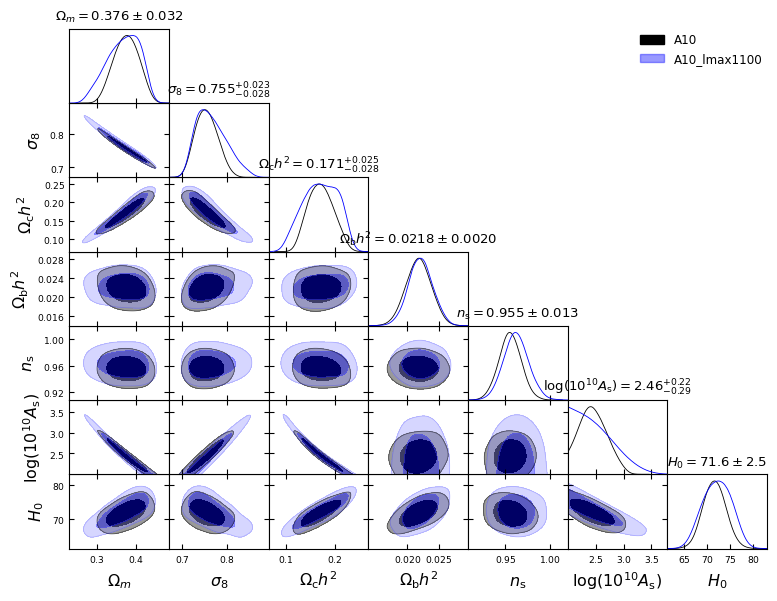

In [8]:
samples = [run_mock, run_lmax1100]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["omegam", "sigma8", "omch2","ombh2","ns","logA","H0"],   # Paramètres à afficher
    filled=[True],
    legend_labels=["A10", "A10_lmax1100"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "red"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('Cosmo_tSZ_Mock.pdf')

### Inutile

<Figure size 900x675 with 0 Axes>

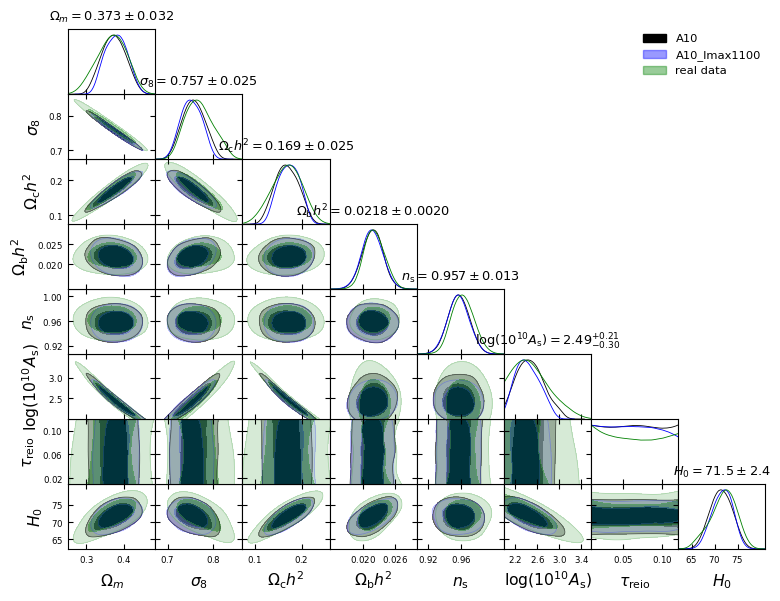

In [5]:
samples = [run_mock, run_lmax1100, run]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["omegam", "sigma8", "omch2","ombh2","ns","logA","tau","H0"],   # Paramètres à afficher
    filled=[True],
    legend_labels=["A10", "A10_lmax1100", "real data"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "green"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('Cosmo_tSZ_Mock.pdf')

## Avec beta libre

In [9]:
path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/"
run_mock = getdist.loadMCSamples(path+'config_Mock_A10_betafree',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)
run_lmax1100 = getdist.loadMCSamples(path+'config_Mock_A10_lmax1100_betafree',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)

C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data\config_Mock_A10_betafree.1.txt
Removed 0.3 as burn in
C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data\config_Mock_A10_lmax1100_betafree.1.txt
Removed 0.3 as burn in


<Figure size 900x675 with 0 Axes>

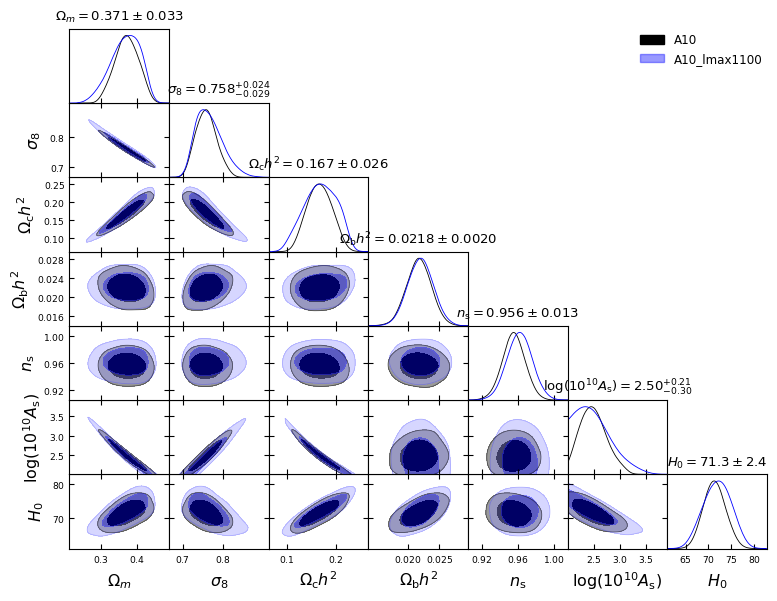

In [10]:
samples = [run_mock, run_lmax1100]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["omegam", "sigma8", "omch2","ombh2","ns","logA","H0"],   # Paramètres à afficher
    filled=[True],
    legend_labels=["A10", "A10_lmax1100"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "red"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('Cosmo_tSZ_Mock_betafree.pdf')

# Influence des paramètres cosmologiques et du profil de pression sur le tSZ Power Spectrum

### Valeurs par défaut:
`()` : paramètres non modifiés par la suite
```
(cosmomc_theta = 0.011)
logA = 3
ns = 0.95
ombh2 = 0.021
omch2 = 0.15
(tau = 0.06)
mnu = 0.06

(alpha_sz = 1.789)
(logystar_sz = -0.186)
(bias_sz = 0.7092198581560284)
(scatter_sz = 0.075)
(beta_sz = 0.66666)

pp_kappa = 2.6666666
pp_delta = 0.786666 (2/3 + 0.12)
pp_P0 = 8.403
pp_alpha = 1.0510
pp_beta = 5.4905
pp_gamma = 0.3081
pp_c500 = 1.177
```

Tous les `A` : 1

In [2]:
path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/Mock/mock_"
column_names = ['ell', 'Cll', 'Tll', 'sigma_Tll']
default = pd.read_csv(path + 'default.txt', delim_whitespace=True, header=None, names=column_names)
logA_minus10 = pd.read_csv(path + 'logA-10%.txt', delim_whitespace=True, header=None, names=column_names)
logA_plus10 = pd.read_csv(path + 'logA+10%.txt', delim_whitespace=True, header=None, names=column_names)
mnu_minus10 = pd.read_csv(path + 'mnu-10%.txt', delim_whitespace=True, header=None, names=column_names)
mnu_plus10 = pd.read_csv(path + 'mnu+10%.txt', delim_whitespace=True, header=None, names=column_names)
ns_minus10 = pd.read_csv(path + 'ns-10%.txt', delim_whitespace=True, header=None, names=column_names)
ns_plus10 = pd.read_csv(path + 'ns+10%.txt', delim_whitespace=True, header=None, names=column_names)
ombh2_minus10 = pd.read_csv(path + 'ombh2-10%.txt', delim_whitespace=True, header=None, names=column_names)
ombh2_plus10 = pd.read_csv(path + 'ombh2+10%.txt', delim_whitespace=True, header=None, names=column_names)
omch2_minus10 = pd.read_csv(path + 'omch2-10%.txt', delim_whitespace=True, header=None, names=column_names)
omch2_plus10 = pd.read_csv(path + 'omch2+10%.txt', delim_whitespace=True, header=None, names=column_names)

alpha_minus10 = pd.read_csv(path + 'ppalpha-10%.txt', delim_whitespace=True, header=None, names=column_names)
alpha_plus10 = pd.read_csv(path + 'ppalpha+10%.txt', delim_whitespace=True, header=None, names=column_names)
beta_minus10 = pd.read_csv(path + 'ppbeta-10%.txt', delim_whitespace=True, header=None, names=column_names)
beta_plus10 = pd.read_csv(path + 'ppbeta+10%.txt', delim_whitespace=True, header=None, names=column_names)
c500_minus10 = pd.read_csv(path + 'ppc500-10%.txt', delim_whitespace=True, header=None, names=column_names)
c500_plus10 = pd.read_csv(path + 'ppc500+10%.txt', delim_whitespace=True, header=None, names=column_names)
delta_minus10 = pd.read_csv(path + 'ppdelta-10%.txt', delim_whitespace=True, header=None, names=column_names)
delta_plus10 = pd.read_csv(path + 'ppdelta+10%.txt', delim_whitespace=True, header=None, names=column_names)
gamma_minus10 = pd.read_csv(path + 'ppgamma-10%.txt', delim_whitespace=True, header=None, names=column_names)
gamma_plus10 = pd.read_csv(path + 'ppgamma+10%.txt', delim_whitespace=True, header=None, names=column_names)
kappa_minus10 = pd.read_csv(path + 'ppkappa-10%.txt', delim_whitespace=True, header=None, names=column_names)
kappa_plus10 = pd.read_csv(path + 'ppkappa+10%.txt', delim_whitespace=True, header=None, names=column_names)
P0_minus10 = pd.read_csv(path + 'ppP0-10%.txt', delim_whitespace=True, header=None, names=column_names)
P0_plus10 = pd.read_csv(path + 'ppP0+10%.txt', delim_whitespace=True, header=None, names=column_names)

## C_l

### logA

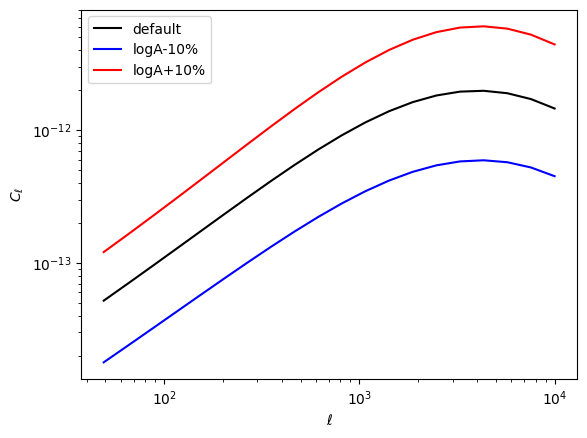

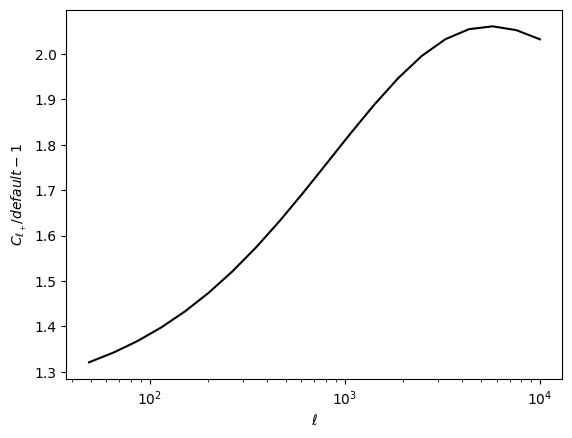

In [53]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(logA_minus10['ell'], logA_minus10['Cll'], label='logA-10%', color='blue')
plt.plot(logA_plus10['ell'], logA_plus10['Cll'], label='logA+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], logA_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### mnu

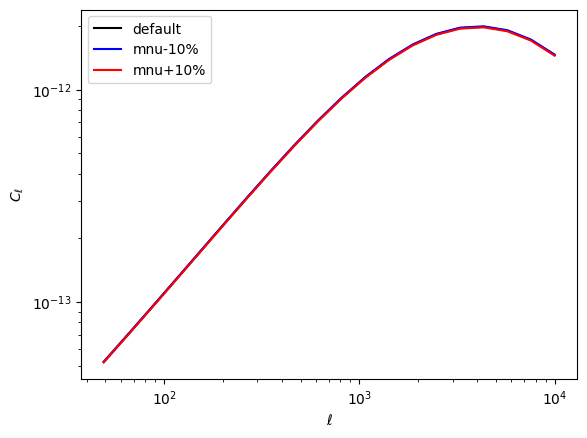

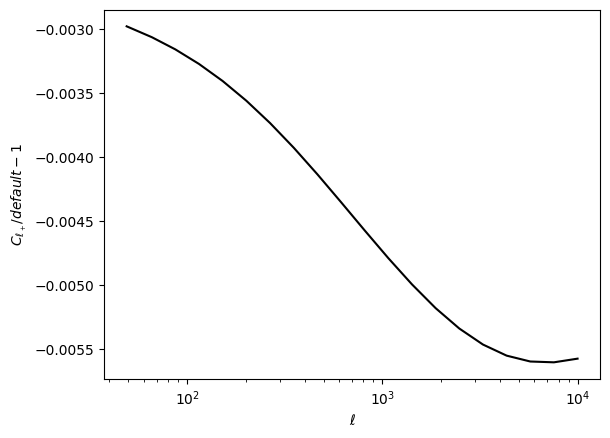

In [54]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(mnu_minus10['ell'], mnu_minus10['Cll'], label='mnu-10%', color='blue')
plt.plot(mnu_plus10['ell'], mnu_plus10['Cll'], label='mnu+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()
plt.plot(default['ell'], mnu_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### ns

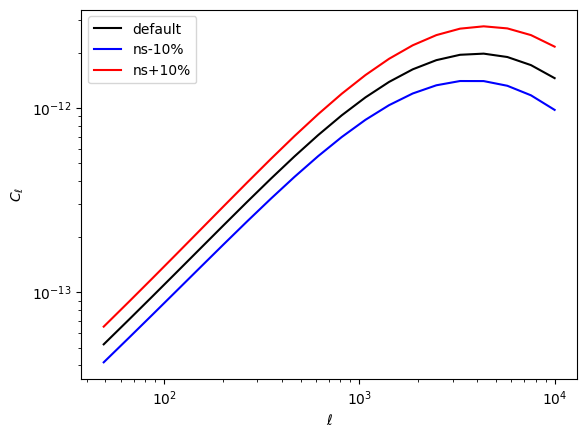

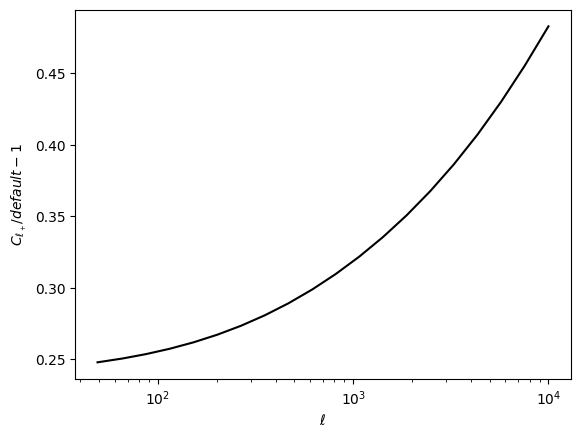

In [55]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(ns_minus10['ell'], ns_minus10['Cll'], label='ns-10%', color='blue')
plt.plot(ns_plus10['ell'], ns_plus10['Cll'], label='ns+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], ns_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### ombh2

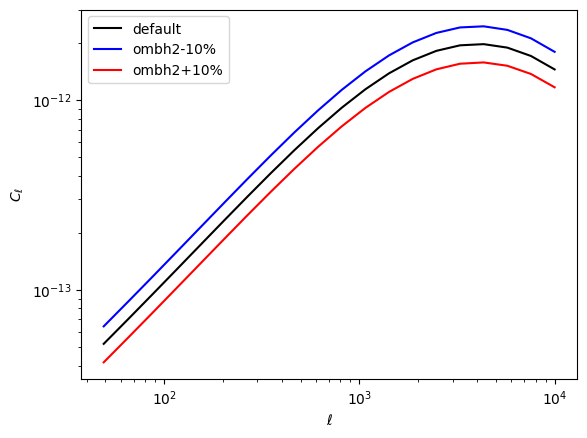

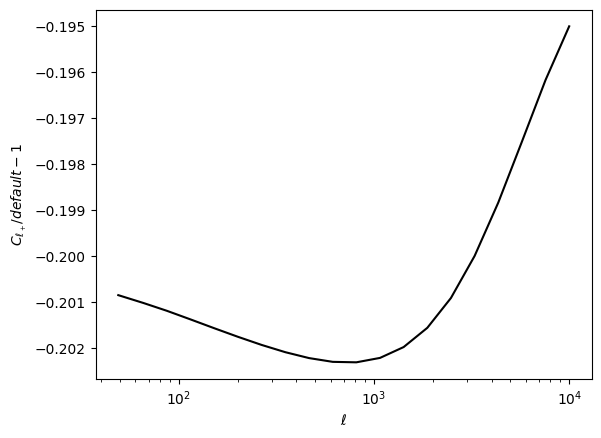

In [56]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(ombh2_minus10['ell'], ombh2_minus10['Cll'], label='ombh2-10%', color='blue')
plt.plot(ombh2_plus10['ell'], ombh2_plus10['Cll'], label='ombh2+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], ombh2_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### omch2

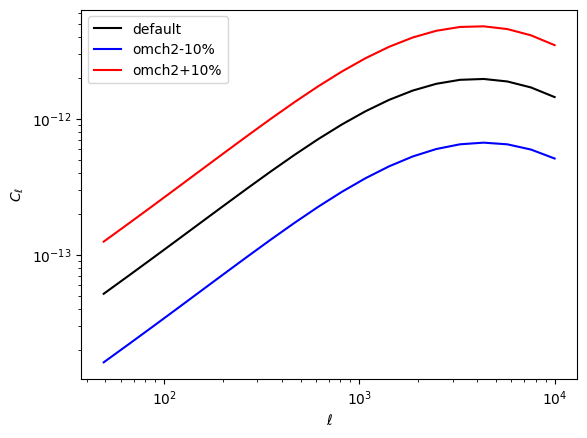

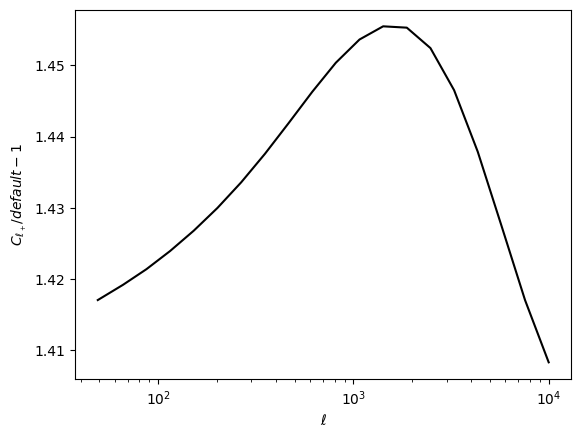

In [57]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(omch2_minus10['ell'], omch2_minus10['Cll'], label='omch2-10%', color='blue')
plt.plot(omch2_plus10['ell'], omch2_plus10['Cll'], label='omch2+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], omch2_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### alpha

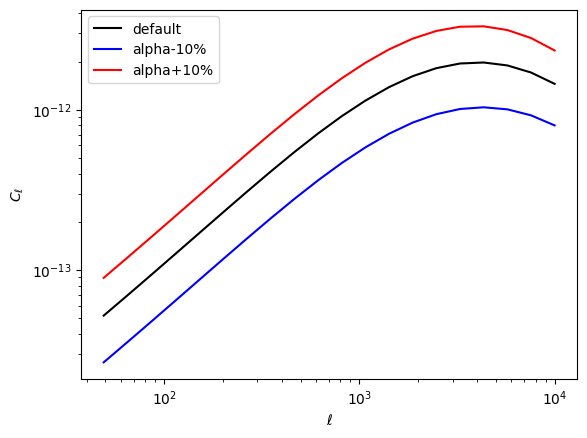

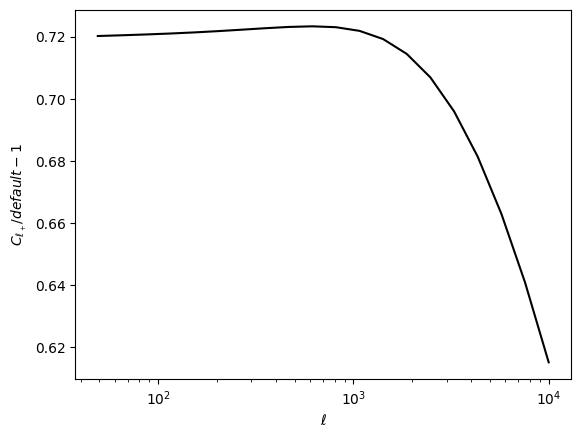

In [58]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(alpha_minus10['ell'], alpha_minus10['Cll'], label='alpha-10%', color='blue')
plt.plot(alpha_plus10['ell'], alpha_plus10['Cll'], label='alpha+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], alpha_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### beta

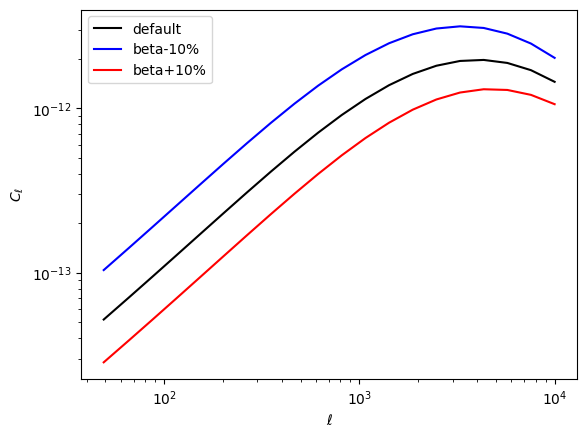

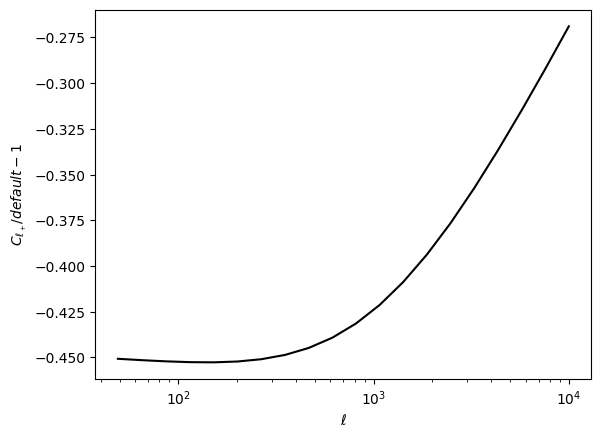

In [59]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(beta_minus10['ell'], beta_minus10['Cll'], label='beta-10%', color='blue')
plt.plot(beta_plus10['ell'], beta_plus10['Cll'], label='beta+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], beta_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### c500

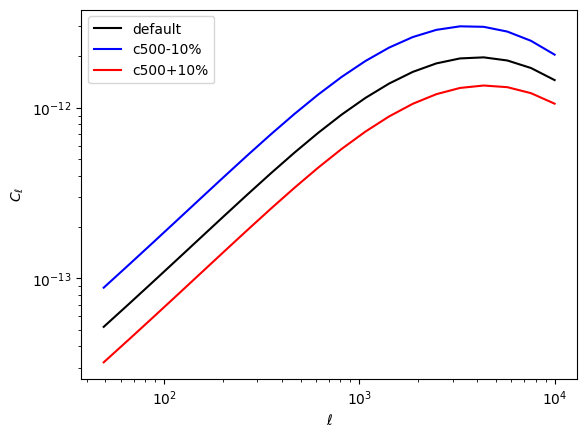

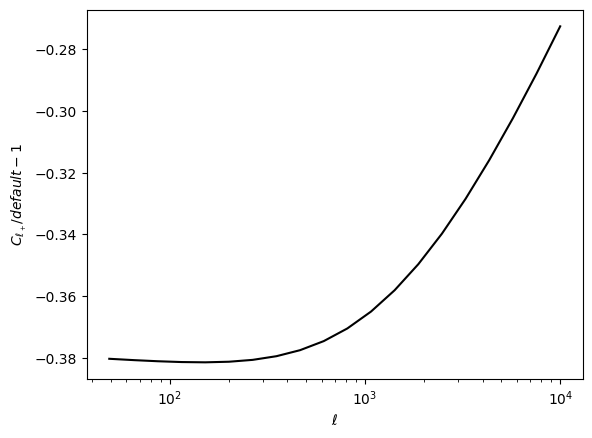

In [60]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(c500_minus10['ell'], c500_minus10['Cll'], label='c500-10%', color='blue')
plt.plot(c500_plus10['ell'], c500_plus10['Cll'], label='c500+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], c500_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### delta

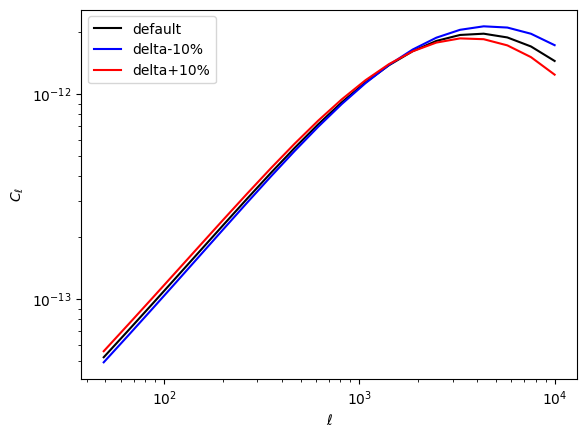

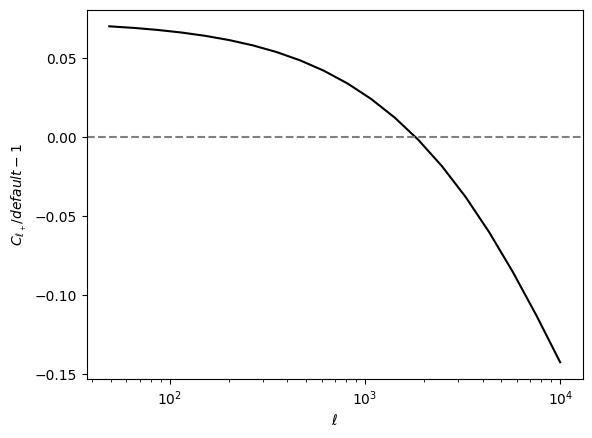

In [61]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(delta_minus10['ell'], delta_minus10['Cll'], label='delta-10%', color='blue')
plt.plot(delta_plus10['ell'], delta_plus10['Cll'], label='delta+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], delta_plus10['Cll']/default['Cll'] - 1, color='black')
plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### gamma

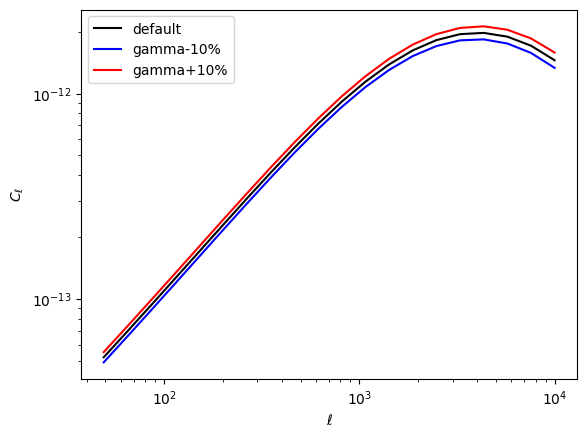

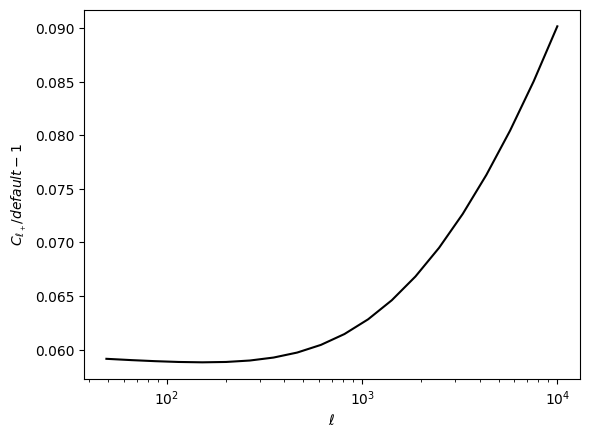

In [62]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(gamma_minus10['ell'], gamma_minus10['Cll'], label='gamma-10%', color='blue')
plt.plot(gamma_plus10['ell'], gamma_plus10['Cll'], label='gamma+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], gamma_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### kappa

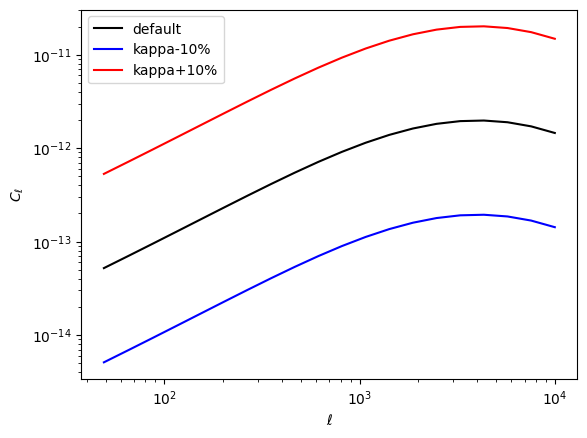

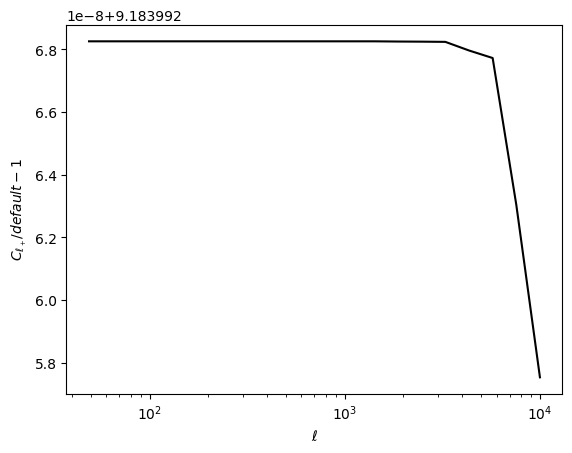

In [63]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(kappa_minus10['ell'], kappa_minus10['Cll'], label='kappa-10%', color='blue')
plt.plot(kappa_plus10['ell'], kappa_plus10['Cll'], label='kappa+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], kappa_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

### P0

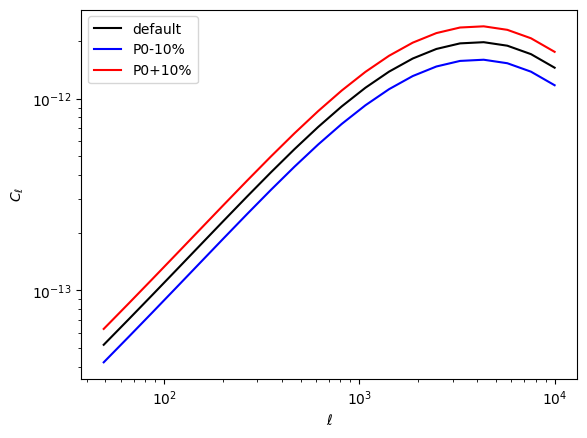

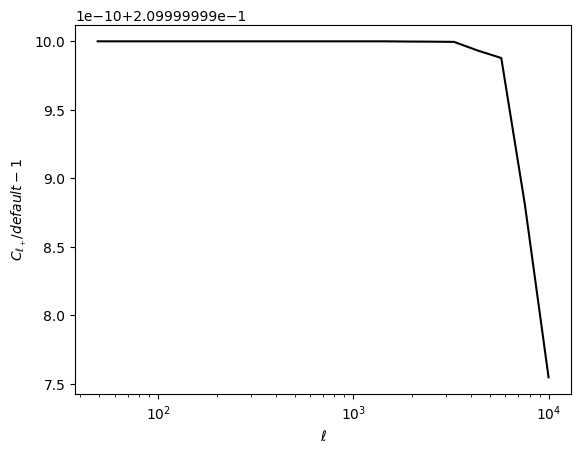

In [64]:
plt.plot(default['ell'], default['Cll'], label='default', color='black')
plt.plot(P0_minus10['ell'], P0_minus10['Cll'], label='P0-10%', color='blue')
plt.plot(P0_plus10['ell'], P0_plus10['Cll'], label='P0+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(default['ell'], P0_plus10['Cll']/default['Cll'] - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell_+}/default - 1$')
plt.show()

## Pressure profile p

In [75]:
def pp(x, P0, c500, alpha, beta, gamma):
    return P0/((c500*x)**gamma * (1 + (c500*x)**alpha)**((beta-gamma)/alpha))

L_x = np.linspace(1e-10,2,1000)

In [76]:
# Valeurs par défaut
P0 = 8.403
alpha = 1.0510
beta = 5.4905
gamma = 0.3081
c500 = 1.177

pp_default = pp(L_x, P0, c500, alpha, beta, gamma)

### alpha

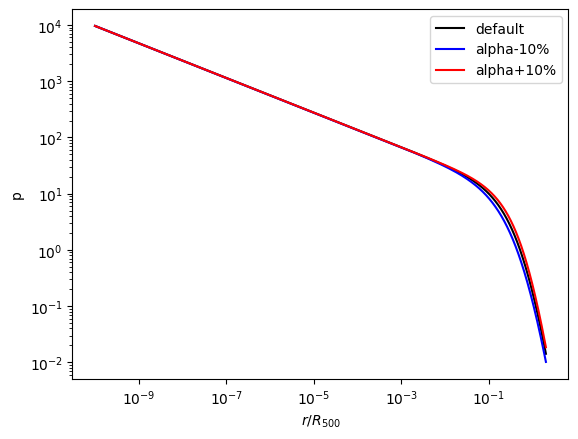

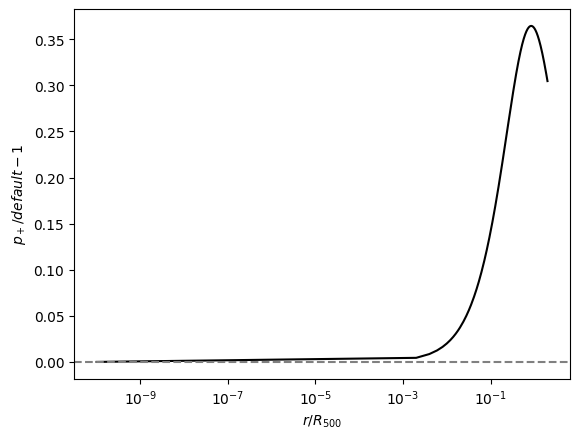

In [81]:
pp_alphaminus10 = pp(L_x, P0, c500, 0.9*alpha, beta, gamma)
pp_alphaplus10 = pp(L_x, P0, c500, 1.1*alpha, beta, gamma)

plt.plot(L_x, pp_default, label='default', color='black')
plt.plot(L_x, pp_alphaminus10, label='alpha-10%', color='blue')
plt.plot(L_x, pp_alphaplus10, label='alpha+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel('p')
plt.show()

plt.plot(L_x, pp_alphaplus10/pp_default - 1, color='black')
plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$p_+/default - 1$')
plt.show()

### beta

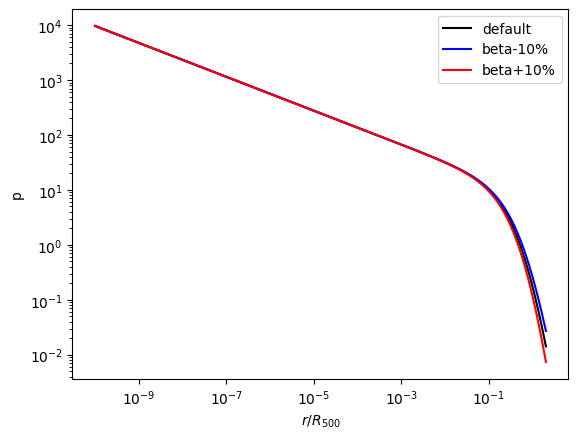

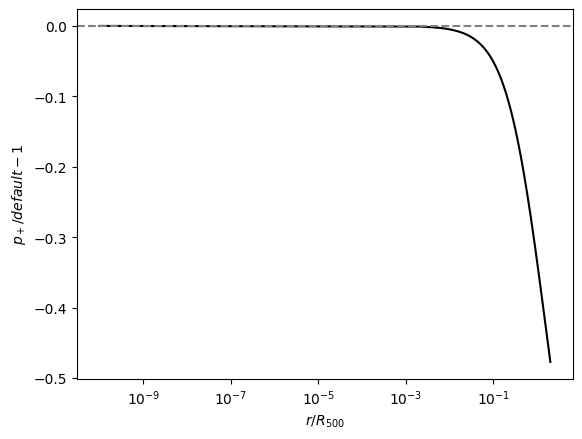

In [82]:
pp_betaminus10 = pp(L_x, P0, c500, alpha, 0.9*beta, gamma)
pp_betaplus10 = pp(L_x, P0, c500, alpha, 1.1*beta, gamma)

plt.plot(L_x, pp_default, label='default', color='black')
plt.plot(L_x, pp_betaminus10, label='beta-10%', color='blue')
plt.plot(L_x, pp_betaplus10, label='beta+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel('p')
plt.show()

plt.plot(L_x, pp_betaplus10/pp_default - 1, color='black')
plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$p_+/default - 1$')
plt.show()

### gamma

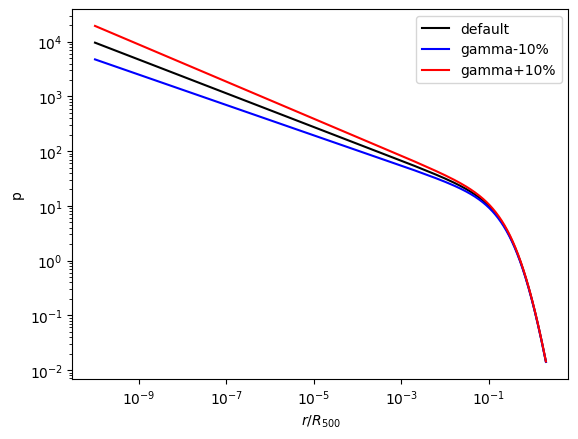

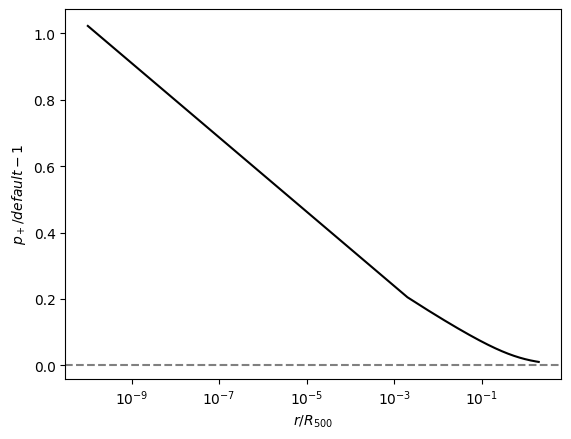

In [83]:
pp_gammaminus10 = pp(L_x, P0, c500, alpha, beta, 0.9*gamma)
pp_gammaplus10 = pp(L_x, P0, c500, alpha, beta, 1.1*gamma)

plt.plot(L_x, pp_default, label='default', color='black')
plt.plot(L_x, pp_gammaminus10, label='gamma-10%', color='blue')
plt.plot(L_x, pp_gammaplus10, label='gamma+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel('p')
plt.show()

plt.plot(L_x, pp_gammaplus10/pp_default - 1, color='black')
plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$p_+/default - 1$')
plt.show()

### c500

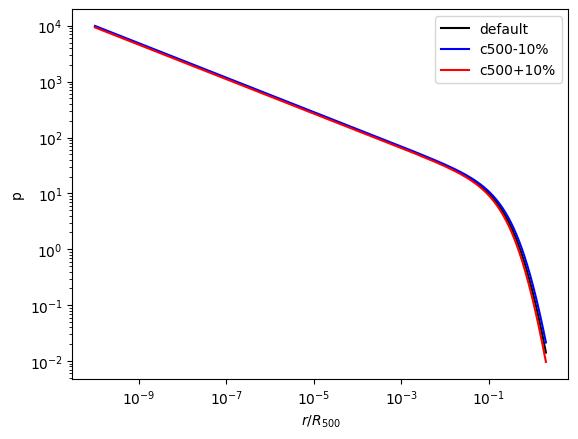

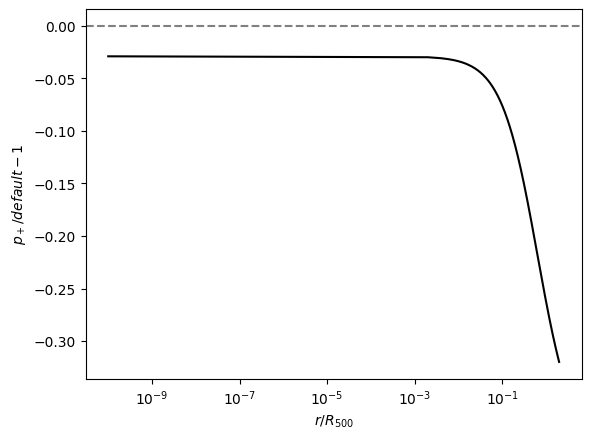

In [84]:
pp_c500minus10 = pp(L_x, P0, 0.9*c500, alpha, beta, gamma)
pp_c500plus10 = pp(L_x, P0, 1.1*c500, alpha, beta, gamma)

plt.plot(L_x, pp_default, label='default', color='black')
plt.plot(L_x, pp_c500minus10, label='c500-10%', color='blue')
plt.plot(L_x, pp_c500plus10, label='c500+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel('p')
plt.show()

plt.plot(L_x, pp_c500plus10/pp_default - 1, color='black')
plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$p_+/default - 1$')
plt.show()

### P0

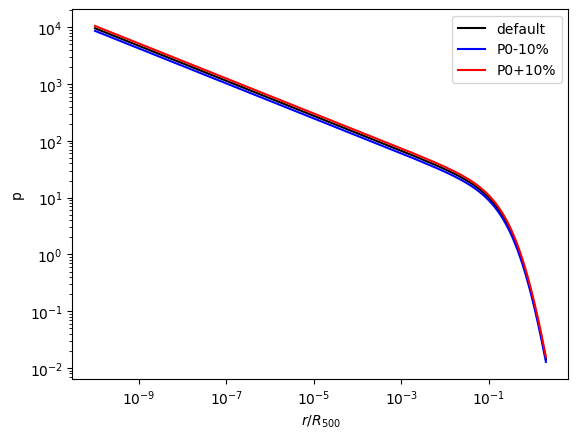

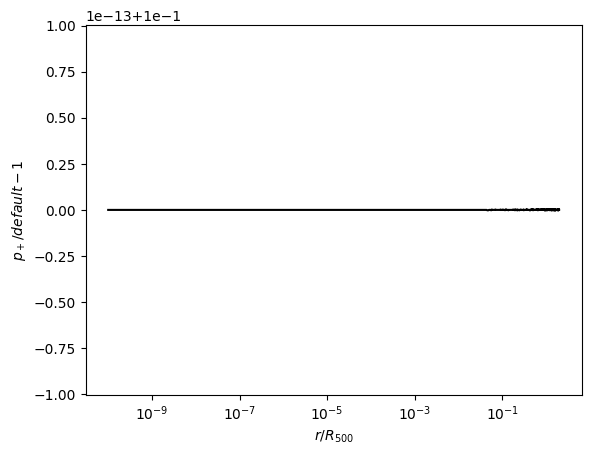

In [85]:
pp_P0minus10 = pp(L_x, 0.9*P0, c500, alpha, beta, gamma)
pp_P0plus10 = pp(L_x, 1.1*P0, c500, alpha, beta, gamma)

plt.plot(L_x, pp_default, label='default', color='black')
plt.plot(L_x, pp_P0minus10, label='P0-10%', color='blue')
plt.plot(L_x, pp_P0plus10, label='P0+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel('p')
plt.show()

plt.plot(L_x, pp_P0plus10/pp_default - 1, color='black')
# plt.axhline(0, color='gray', linestyle='--')
plt.xscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$p_+/default - 1$')
plt.show()

## Pressure profile P

In [91]:
h = 70
M500 = 5e14     # h^-1 Msun
z = 0.3

def P500(M500, z, Omega_m, delta, kappa):   # Unité: h^2 keV cm^-3
    Omega_lambda = 1 - Omega_m
    h_z = np.sqrt(Omega_m*(1+z)**3 + Omega_lambda)  # TODO: il y a bien la racine carrée ?
    return 1.65e-3 * h_z**kappa * (M500/3e14)**delta

def P(x, M500, z, ombh2, omch2, delta, kappa):
    Omega_m = (ombh2 + omch2) / h**2
    return pp(x, P0, c500, alpha, beta, gamma)*P500(M500, z, Omega_m, delta, kappa)
    

In [93]:
ombh2 = 0.021
omch2 = 0.15
pp_kappa = 2.6666666
pp_delta = 0.786666

L_x = np.linspace(1e-10,2,1000)

P_default = P(L_x,M500, z, ombh2, omch2, pp_delta, pp_kappa)

### ombh2

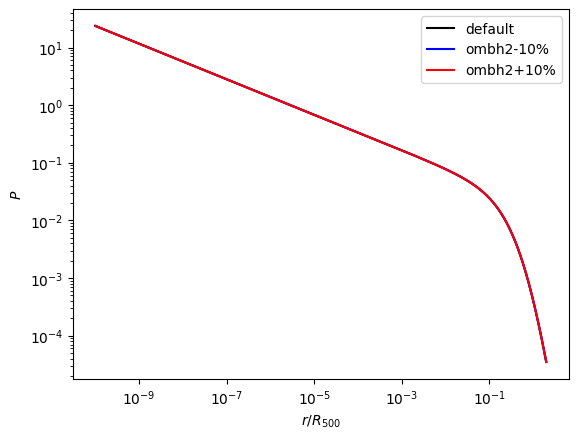

Variation:  6.839714703970045e-07


In [98]:
P_ombh2minus10 = P(L_x, M500, z, 0.9*ombh2, omch2, pp_delta, pp_kappa)
P_ombh2plus10 = P(L_x, M500, z, 1.1*ombh2, omch2, pp_delta, pp_kappa)

plt.plot(L_x, P_default, label='default', color='black')
plt.plot(L_x, P_ombh2minus10, label='ombh2-10%', color='blue')
plt.plot(L_x, P_ombh2plus10, label='ombh2+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$P$')
plt.show()

print("Variation: ", np.mean(P_ombh2plus10/P_default - 1))

### omch2

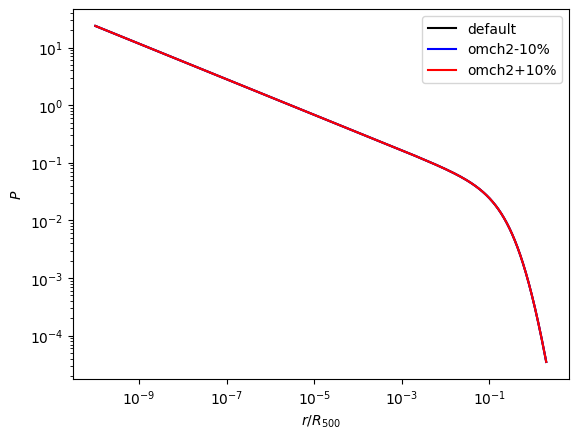

Variation:  4.885513065490787e-06


In [99]:
P_omch2minus10 = P(L_x, M500, z, ombh2, 0.9*omch2, pp_delta, pp_kappa)
P_omch2plus10 = P(L_x, M500, z, ombh2, 1.1*omch2, pp_delta, pp_kappa)

plt.plot(L_x, P_default, label='default', color='black')
plt.plot(L_x, P_omch2minus10, label='omch2-10%', color='blue')
plt.plot(L_x, P_omch2plus10, label='omch2+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$P$')
plt.show()

print("Variation: ", np.mean(P_omch2plus10/P_default - 1))

### delta

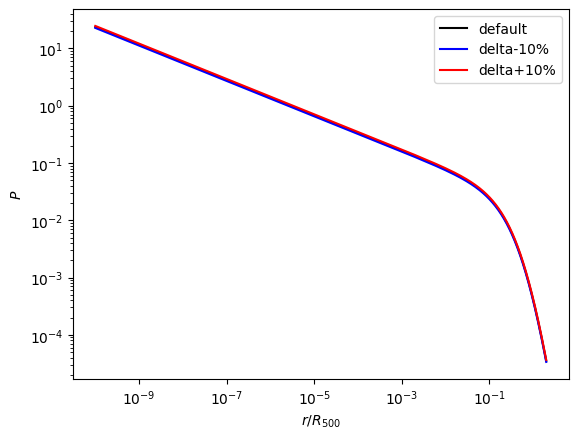

Variation:  0.04100325352745258


In [100]:
P_deltaminus10 = P(L_x, M500, z, ombh2, omch2, 0.9*pp_delta, pp_kappa)
P_deltaplus10 = P(L_x, M500, z, ombh2, omch2, 1.1*pp_delta, pp_kappa)

plt.plot(L_x, P_default, label='default', color='black')
plt.plot(L_x, P_deltaminus10, label='delta-10%', color='blue')
plt.plot(L_x, P_deltaplus10, label='delta+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$P$')
plt.show()

print("Variation: ", np.mean(P_deltaplus10/P_default - 1))

### kappa

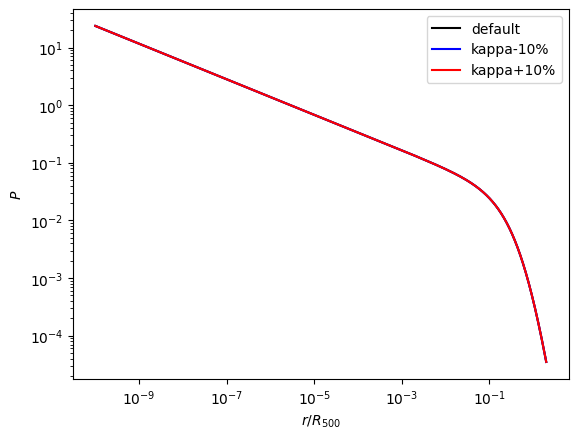

Variation:  5.569613328810341e-06


In [101]:
P_kappaminus10 = P(L_x, M500, z, ombh2, omch2, pp_delta, 0.9*pp_kappa)
P_kappaplus10 = P(L_x, M500, z, ombh2, omch2, pp_delta, 1.1*pp_kappa)

plt.plot(L_x, P_default, label='default', color='black')
plt.plot(L_x, P_kappaminus10, label='kappa-10%', color='blue')
plt.plot(L_x, P_kappaplus10, label='kappa+10%', color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/R_{500}$')
plt.ylabel(r'$P$')
plt.show()

print("Variation: ", np.mean(P_kappaplus10/P_default - 1))